#### hello boys

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import holidays

In [20]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [22]:
df.describe()   

,Unnamed: 0,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,196719.500000,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,113576.489292,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,0.000000,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,98359.750000,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,196719.500000,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,295079.250000,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,393439.000000,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


In [23]:
df.isnull().sum()   

Unnamed: 0        0
datetime          0
Power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [25]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [26]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


/tmp/ipykernel_5504/245227638.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


In [27]:
df.isnull().sum()

datetime        0
Power demand    0
temp            0
year            0
month           0
date            0
day             0
dtype: int64

In [28]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


In [29]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [30]:
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0


In [31]:
indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

print(df.head(50).columns)

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday'],
      dtype='object')


In [32]:
df_demo = df[(df["year"] == 2021) & (df["month"] == 1) & (df["date"] == 26)]
df_demo.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday
599,2021-01-26 00:00:00,24259.05,10.5,2021,1,26,1,0,1
600,2021-01-26 01:00:00,21242.33,9.5,2021,1,26,1,0,1
601,2021-01-26 02:00:00,19843.96,9.1,2021,1,26,1,0,1
602,2021-01-26 03:00:00,19192.37,9.1,2021,1,26,1,0,1
603,2021-01-26 04:00:00,19808.41,8.5,2021,1,26,1,0,1


In [33]:
df_2021 = df[(df["year"] == 2021)]
monthly_df_2021 = df_2021.groupby(by="month").agg({
    "Power demand": "sum",
    "temp": "mean"  
}).reset_index()
monthly_df_2021

,month,Power demand,temp
0,1,28851854.54,12.867139
1,2,22293879.30,18.596414
2,3,27154671.14,24.816944
3,4,25838875.32,29.222153
4,5,27184997.88,30.552868
5,6,34513677.93,32.206883
6,7,33094883.97,31.681422
7,8,36513004.46,30.375448
8,9,32455879.90,28.624253
9,10,27175182.48,26.241963


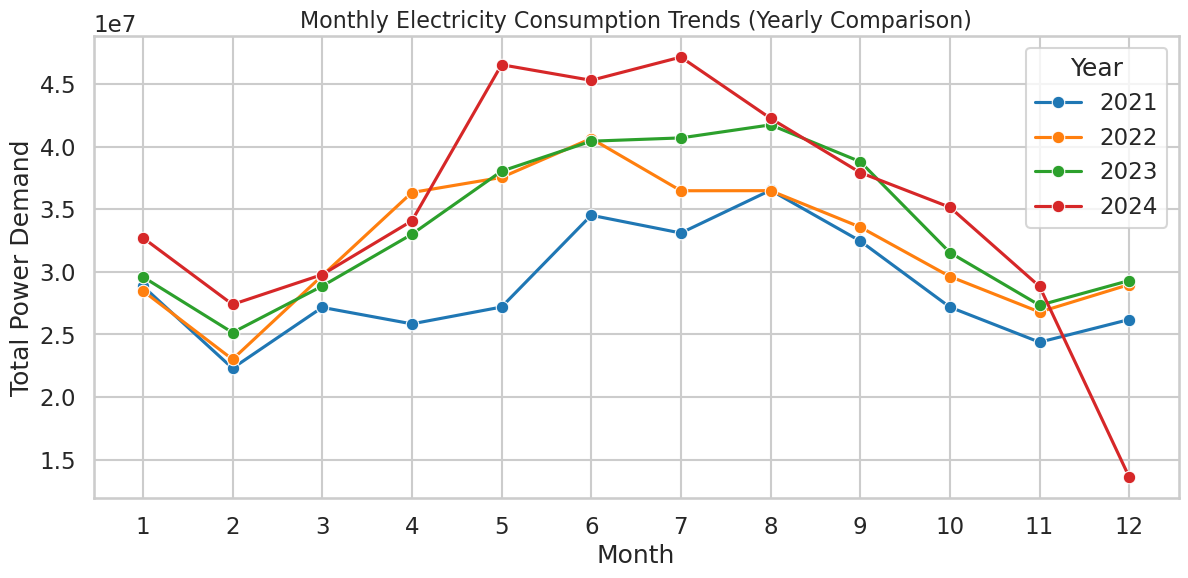

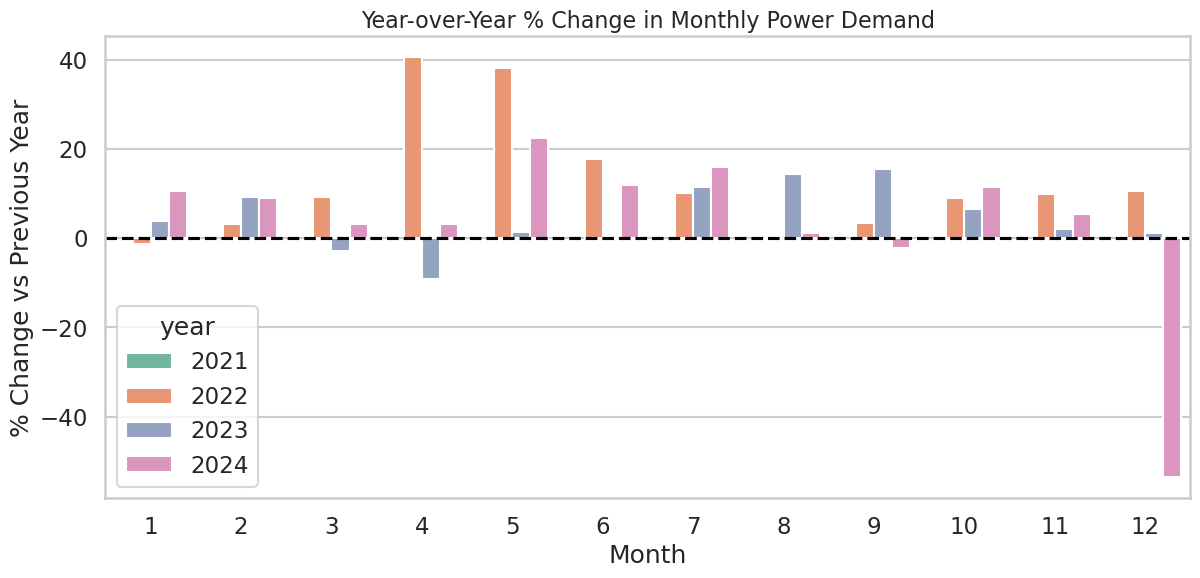

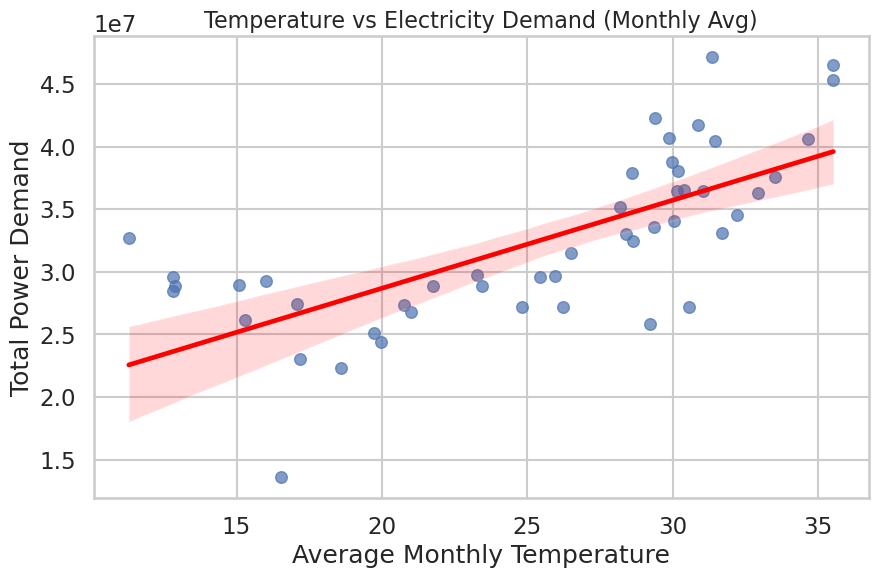

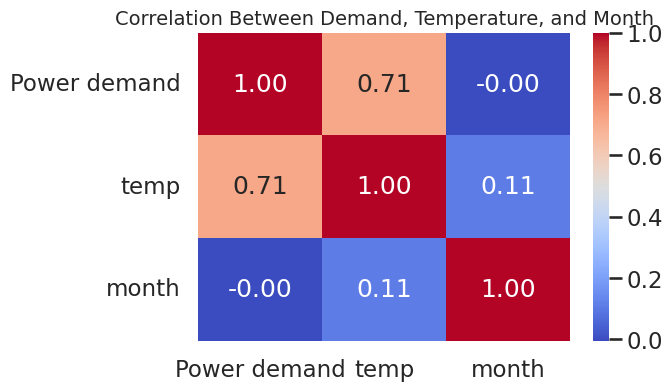

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 📌 Setup
sns.set(style="whitegrid", context="talk")

# --- 1️⃣ Group data by year + month ---
monthly_df = (
    df.groupby(["year", "month"])
    .agg({
        "Power demand": "sum",
        "temp": "mean"
    })
    .reset_index()
)

# --- 2️⃣ Line plot: Monthly consumption trends ---
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_df,
    x="month", y="Power demand", hue="year", marker="o", palette="tab10"
)
plt.title("Monthly Electricity Consumption Trends (Yearly Comparison)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Power Demand")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

# --- 4️⃣ YoY % change per month ---
monthly_df["pct_change"] = monthly_df.groupby("month")["Power demand"].pct_change() * 100
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_df, x="month", y="pct_change", hue="year", palette="Set2"
)
plt.title("Year-over-Year % Change in Monthly Power Demand", fontsize=16)
plt.xlabel("Month")
plt.ylabel("% Change vs Previous Year")
plt.axhline(0, color="black", linestyle="--")
plt.show()

# --- 7️⃣ Temperature vs Demand correlation ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=monthly_df, x="temp", y="Power demand", scatter_kws={"s": 70, "alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Temperature vs Electricity Demand (Monthly Avg)", fontsize=16)
plt.xlabel("Average Monthly Temperature")
plt.ylabel("Total Power Demand")
plt.show()

# --- 8️⃣ Correlation heatmap (temp vs demand vs month) ---
corr = monthly_df[["Power demand", "temp", "month"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Demand, Temperature, and Month", fontsize=14)
plt.show()

In [35]:
# ===== ADVANCED FEATURE ENGINEERING FOR BETTER PREDICTION ACCURACY =====

# 1. Create time-based features
df['hour'] = df['datetime'].dt.hour
df['quarter'] = df['datetime'].dt.quarter
df['week_of_year'] = df['datetime'].dt.isocalendar().week
# 2. Create cyclical features (important for time series)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Lag features (previous values impact current demand)
df = df.sort_values('datetime').reset_index(drop=True) 
for lag in [1,24]:  # 1h, 2h, 3h, 6h, 12h, 1day, 1week lags
    df[f'power_lag_{lag}'] = df['Power demand'].shift(lag)
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)

# 4. Rolling statistics (trend and seasonality indicators)
for window in [3,24]:  
    df[f'power_rolling_mean_{window}'] = df['Power demand'].rolling(window=window, min_periods=1).mean()
    

# 5. Interaction features
df['temp_hour_interaction'] = df['temp'] * df['hour']

df.fillna(method='bfill', inplace=True)
df.head()

/tmp/ipykernel_5504/3688184584.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0,0,0,...,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,11853.250000,11853.250,0.0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0,0,1,...,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,16760.165000,16760.165,8.0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0,0,2,...,-0.900969,0.5,0.866025,21667.08,8.0,11853.25,8.0,17837.100000,17837.100,15.0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0,0,3,...,-0.900969,0.5,0.866025,19990.97,7.5,11853.25,8.0,20315.343333,18199.820,21.0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0,0,4,...,-0.900969,0.5,0.866025,19287.98,7.0,11853.25,8.0,19799.096667,18583.524,26.0


In [36]:
df.columns

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday', 'hour', 'quarter', 'week_of_year',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'power_lag_1', 'temp_lag_1', 'power_lag_24', 'temp_lag_24',
       'power_rolling_mean_3', 'power_rolling_mean_24',
       'temp_hour_interaction'],
      dtype='object')

In [37]:
df.describe()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
count,33074,33074.000000,33074.00000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,...,33074.000000,3.307400e+04,3.307400e+04,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000,33074.000000
mean,2022-12-26 13:44:41.441615872,47115.926601,25.51463,2022.490627,6.453649,15.749531,3.001935,0.287265,0.031626,11.262412,...,0.001260,-4.992318e-03,-1.383508e-02,47115.836509,25.514500,47095.454489,25.510758,47115.747803,47110.531406,299.733073
min,2021-01-01 00:00:00,2297.490000,4.50000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.900969,-1.000000e+00,-1.000000e+00,2297.490000,4.500000,2297.490000,4.500000,11196.930000,11853.250000,0.000000
25%,2021-12-30 17:15:00,36601.122500,19.80000,2021.000000,3.000000,8.000000,1.000000,0.000000,0.000000,5.000000,...,-0.900969,-8.660254e-01,-8.660254e-01,36601.122500,19.800000,36586.275000,19.800000,36699.410000,35616.538021,104.000000
50%,2023-01-03 05:30:00,45689.270000,27.00000,2023.000000,6.000000,16.000000,3.000000,0.000000,0.000000,11.000000,...,-0.222521,1.224647e-16,-1.836970e-16,45689.270000,27.000000,45677.860000,27.000000,45563.620000,43861.966458,278.400000
75%,2023-12-17 21:45:00,58055.917500,31.10000,2023.000000,9.000000,23.000000,5.000000,1.000000,0.000000,17.000000,...,0.623490,5.000000e-01,5.000000e-01,58055.917500,31.100000,58055.917500,31.100000,57872.358333,57833.125521,474.000000
max,2024-12-12 00:00:00,102781.620000,46.20000,2024.000000,12.000000,31.000000,6.000000,1.000000,1.000000,23.000000,...,1.000000,1.000000e+00,1.000000e+00,102781.620000,46.200000,102781.620000,46.200000,101332.580000,88358.191250,895.160000
std,NaN,15673.385374,7.95123,1.109760,3.414038,8.781877,2.002009,0.452493,0.175005,6.843693,...,0.706941,7.112143e-01,7.028429e-01,15673.579507,7.951481,15699.367020,7.957969,15264.222257,13070.275375,213.525013


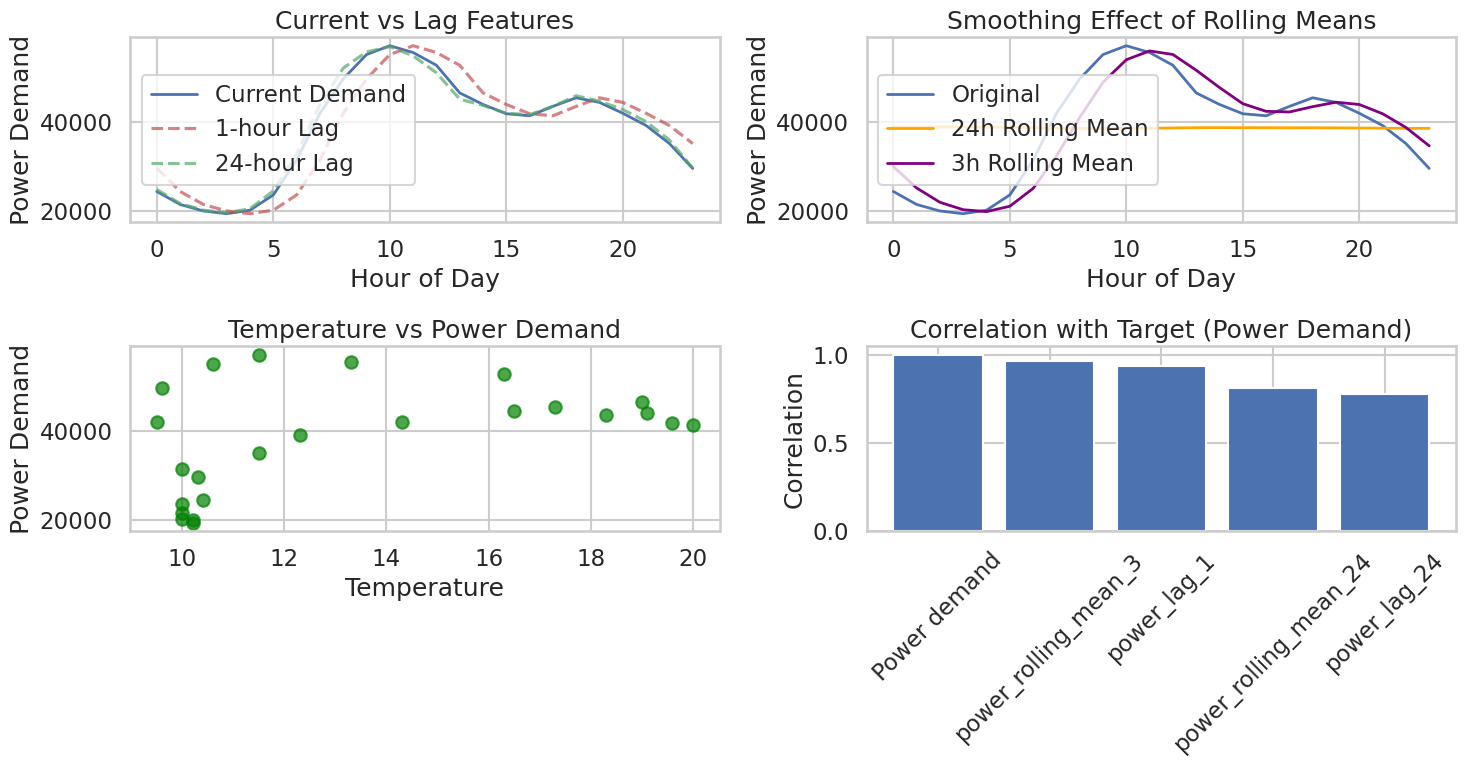


=== CORRELATION WITH TARGET ===
Power demand             1.000
power_rolling_mean_3     0.968
power_lag_1              0.940
power_rolling_mean_24    0.812
power_lag_24             0.778
Name: Power demand, dtype: float64


In [38]:
# ===== PRACTICAL EXAMPLE: Understanding Lag and Rolling Features =====

# Let's look at a specific time period to understand these features
example_data = df[df['datetime'].dt.date == pd.to_datetime('2021-01-15').date()].copy()

# Add hour feature for plotting (extract from datetime)
example_data['hour'] = example_data['datetime'].dt.hour

# Create a comparison DataFrame showing original vs engineered features
available_columns = ['datetime', 'Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    available_columns.append('power_rolling_mean_24')

comparison_df = example_data[available_columns].head(10)

# Visualize the relationship
plt.figure(figsize=(15, 8))

# Plot 1: Original vs Lag features
plt.subplot(2, 2, 1)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Current Demand', linewidth=2)
plt.plot(example_data['hour'], example_data['power_lag_1'], 'r--', label='1-hour Lag', alpha=0.7)
plt.plot(example_data['hour'], example_data['power_lag_24'], 'g--', label='24-hour Lag', alpha=0.7)
plt.title('Current vs Lag Features')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 2: Rolling mean smoothing effect (if available)
plt.subplot(2, 2, 2)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Original', linewidth=2)
if 'power_rolling_mean_24' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_24'], 'orange', label='24h Rolling Mean', linewidth=2)
if 'power_rolling_mean_3' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_3'], 'purple', label='3h Rolling Mean', linewidth=2)
plt.title('Smoothing Effect of Rolling Means')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 3: Temperature vs Power Demand
plt.subplot(2, 2, 3)
if 'temp' in example_data.columns:
    plt.scatter(example_data['temp'], example_data['Power demand'], alpha=0.7, color='green')
    plt.xlabel('Temperature')
    plt.ylabel('Power Demand')
    plt.title('Temperature vs Power Demand')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Temperature data not available', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('Temperature Analysis (Not Available)')

# Plot 4: Correlation with target (using available features)
plt.subplot(2, 2, 4)
correlation_features = ['Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    correlation_features.append('power_rolling_mean_24')
if 'power_rolling_mean_3' in df.columns:
    correlation_features.append('power_rolling_mean_3')

correlations = df[correlation_features].corr()['Power demand'].sort_values(ascending=False)
plt.bar(range(len(correlations)), correlations.values)
plt.xticks(range(len(correlations)), correlations.index, rotation=45)
plt.title('Correlation with Target (Power Demand)')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== CORRELATION WITH TARGET ===")
print(correlations.round(3))

In [39]:
df

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
0,2021-01-01 00:00:00,11853.25,8.000000,2021,1,1,4,0,0,0,...,-0.900969,5.000000e-01,0.866025,11853.25,8.000000,11853.25,8.0,11853.250000,11853.250000,0.000000
1,2021-01-01 01:00:00,21667.08,8.000000,2021,1,1,4,0,0,1,...,-0.900969,5.000000e-01,0.866025,11853.25,8.000000,11853.25,8.0,16760.165000,16760.165000,8.000000
2,2021-01-01 02:00:00,19990.97,7.500000,2021,1,1,4,0,0,2,...,-0.900969,5.000000e-01,0.866025,21667.08,8.000000,11853.25,8.0,17837.100000,17837.100000,15.000000
3,2021-01-01 03:00:00,19287.98,7.000000,2021,1,1,4,0,0,3,...,-0.900969,5.000000e-01,0.866025,19990.97,7.500000,11853.25,8.0,20315.343333,18199.820000,21.000000
4,2021-01-01 04:00:00,20118.34,6.500000,2021,1,1,4,0,0,4,...,-0.900969,5.000000e-01,0.866025,19287.98,7.000000,11853.25,8.0,19799.096667,18583.524000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33069,2024-12-11 19:00:00,46661.53,15.400000,2024,12,11,2,0,0,19,...,-0.222521,-2.449294e-16,1.000000,49063.47,16.600000,44904.16,15.8,48016.403333,41238.880000,292.600000
33070,2024-12-11 20:00:00,42853.73,14.200000,2024,12,11,2,0,0,20,...,-0.222521,-2.449294e-16,1.000000,46661.53,15.400000,43495.92,14.8,46192.910000,41212.122083,284.000000
33071,2024-12-11 21:00:00,39826.89,13.350000,2024,12,11,2,0,0,21,...,-0.222521,-2.449294e-16,1.000000,42853.73,14.200000,43169.12,13.8,43114.050000,41072.862500,280.350000
33072,2024-12-11 22:00:00,28541.40,12.966667,2024,12,11,2,0,0,22,...,-0.222521,-2.449294e-16,1.000000,39826.89,13.350000,44692.85,13.1,37074.006667,40399.885417,285.266667


# Machine Learning Pipeline for Energy Demand Prediction

Now we'll create a comprehensive ML pipeline with proper scaling, feature selection, and model training to predict power demand.

In [40]:
# ===== STEP 1: DATA PREPARATION AND FEATURE SELECTION =====

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("=== DATA PREPARATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['datetime'].min()} to {df['datetime'].max()}")

# Select features for ML model (exclude datetime and target)
feature_columns = [col for col in df.columns if col not in ['datetime', 'Power demand']]
target_column = 'Power demand'

# Prepare feature matrix and target vector
X = df[feature_columns].copy()
y = df[target_column].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

=== DATA PREPARATION ===
Dataset shape: (33074, 25)
Date range: 2021-01-01 00:00:00 to 2024-12-12 00:00:00

Feature matrix shape: (33074, 23)
Target vector shape: (33074,)


In [41]:
# ===== STEP 2: TIME-AWARE TRAIN-TEST SPLIT =====

# For time series data, we need to maintain temporal order
# Using 80% for training, 20% for testing (latest data for testing)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shapes: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shapes: X_test {X_test.shape}, y_test {y_test.shape}")


Training set shapes: X_train (26459, 23), y_train (26459,)
Testing set shapes: X_test (6615, 23), y_test (6615,)


In [42]:
# ===== STEP 3: FEATURE SCALING =====

print("=== FEATURE SCALING ===")

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit scalers on training data only (to prevent data leakage)
X_train_scaled_std = standard_scaler.fit_transform(X_train)
X_test_scaled_std = standard_scaler.transform(X_test)

X_train_scaled_minmax = minmax_scaler.fit_transform(X_train)
X_test_scaled_minmax = minmax_scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns, index=X_train.index)
X_test_scaled_std = pd.DataFrame(X_test_scaled_std, columns=X_test.columns, index=X_test.index)

X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=X_train.columns, index=X_train.index)
X_test_scaled_minmax = pd.DataFrame(X_test_scaled_minmax, columns=X_test.columns, index=X_test.index)

print("Scaling completed successfully!")
print(f"StandardScaler - Training set range: [{X_train_scaled_std.min().min():.3f}, {X_train_scaled_std.max().max():.3f}]")
print(f"MinMaxScaler - Training set range: [{X_train_scaled_minmax.min().min():.3f}, {X_train_scaled_minmax.max().max():.3f}]")

# Show scaling effect on a few features
print("\n=== SCALING COMPARISON (First 5 features) ===")
comparison_df = pd.DataFrame({
    'Feature': feature_columns[:5],
    'Original_Mean': [X_train[col].mean() for col in feature_columns[:5]],
    'Original_Std': [X_train[col].std() for col in feature_columns[:5]],
    'StandardScaled_Mean': [X_train_scaled_std[col].mean() for col in feature_columns[:5]],
    'StandardScaled_Std': [X_train_scaled_std[col].std() for col in feature_columns[:5]],
    'MinMaxScaled_Min': [X_train_scaled_minmax[col].min() for col in feature_columns[:5]],
    'MinMaxScaled_Max': [X_train_scaled_minmax[col].max() for col in feature_columns[:5]]
})
print(comparison_df.round(3))

=== FEATURE SCALING ===
Scaling completed successfully!
StandardScaler - Training set range: [-2.861, 5.486]
MinMaxScaler - Training set range: [0.000, 1.000]

=== SCALING COMPARISON (First 5 features) ===
  Feature  Original_Mean  Original_Std  StandardScaled_Mean  \
0    temp         25.524         7.925                 -0.0   
1    year       2022.489         1.111                  0.0   
2   month          6.446         3.413                 -0.0   
3    date         15.758         8.772                 -0.0   
4     day          3.000         1.998                 -0.0   

   StandardScaled_Std  MinMaxScaled_Min  MinMaxScaled_Max  
0                 1.0               0.0               1.0  
1                 1.0               0.0               1.0  
2                 1.0               0.0               1.0  
3                 1.0               0.0               1.0  
4                 1.0               0.0               1.0  


In [43]:
# ===== STEP 4: MODEL SELECTION AND TRAINING =====

print("=== MODEL TRAINING ===")

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6)
}

# Store results
results = {}
trained_models = {}

# We'll use StandardScaler data for most models (better for linear models)
# and original data for tree-based models (they don't require scaling)
scaling_preferences = {
    'Linear Regression': 'standard',
    'Ridge Regression': 'standard', 
    'Lasso Regression': 'standard',
    'Decision Tree': 'none',
    'Random Forest': 'none',
    'Gradient Boosting': 'none'
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Choose appropriate data based on model type
    if scaling_preferences[model_name] == 'standard':
        X_train_model = X_train_scaled_std
        X_test_model = X_test_scaled_std
    elif scaling_preferences[model_name] == 'minmax':
        X_train_model = X_train_scaled_minmax
        X_test_model = X_test_scaled_minmax
    else:  # 'none'
        X_train_model = X_train
        X_test_model = X_test
    
    # Train the model
    model.fit(X_train_model, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_model)
    y_test_pred = model.predict(X_test_model)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[model_name] = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_test_pred,
        'scaling': scaling_preferences[model_name]
    }
    
    # Store trained model
    trained_models[model_name] = model
    
    print(f"  RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f} | R²: {test_r2:.4f}")

print("\n" + "="*60)
print("MODEL COMPARISON COMPLETED!")
print("="*60)

=== MODEL TRAINING ===

Training Linear Regression...
  RMSE: 3454.95 | MAE: 2272.38 | R²: 0.9522

Training Ridge Regression...
  RMSE: 3455.35 | MAE: 2272.46 | R²: 0.9522

Training Lasso Regression...
  RMSE: 3455.43 | MAE: 2272.54 | R²: 0.9522

Training Decision Tree...
  RMSE: 2790.98 | MAE: 1533.71 | R²: 0.9688

Training Random Forest...
  RMSE: 2161.20 | MAE: 1264.42 | R²: 0.9813

Training Gradient Boosting...
  RMSE: 1680.47 | MAE: 952.51 | R²: 0.9887

MODEL COMPARISON COMPLETED!


=== DETAILED MODEL EVALUATION ===

Model Performance Summary (Sorted by Test R² Score):
               Model  Train_RMSE  Test_RMSE  Train_MAE   Test_MAE  Train_R2  \
5  Gradient Boosting   1190.8841  1680.4710   804.3592   952.5076    0.9942   
4      Random Forest   1617.6618  2161.1973  1080.9350  1264.4247    0.9893   
3      Decision Tree   1889.7612  2790.9787  1251.9101  1533.7078    0.9854   
0  Linear Regression   3417.7078  3454.9520  2255.1168  2272.3762    0.9523   
1   Ridge Regression   3417.7164  3455.3480  2255.1639  2272.4567    0.9523   
2   Lasso Regression   3417.8126  3455.4262  2255.2834  2272.5399    0.9523   

   Test_R2   Scaling  
5   0.9887      none  
4   0.9813      none  
3   0.9688      none  
0   0.9522  standard  
1   0.9522  standard  
2   0.9522  standard  

🏆 BEST MODEL: Gradient Boosting
   Test RMSE: 1680.47
   Test MAE:  952.51
   Test R²:   0.9887
   Scaling:   none
   Test MAPE: 2.52%


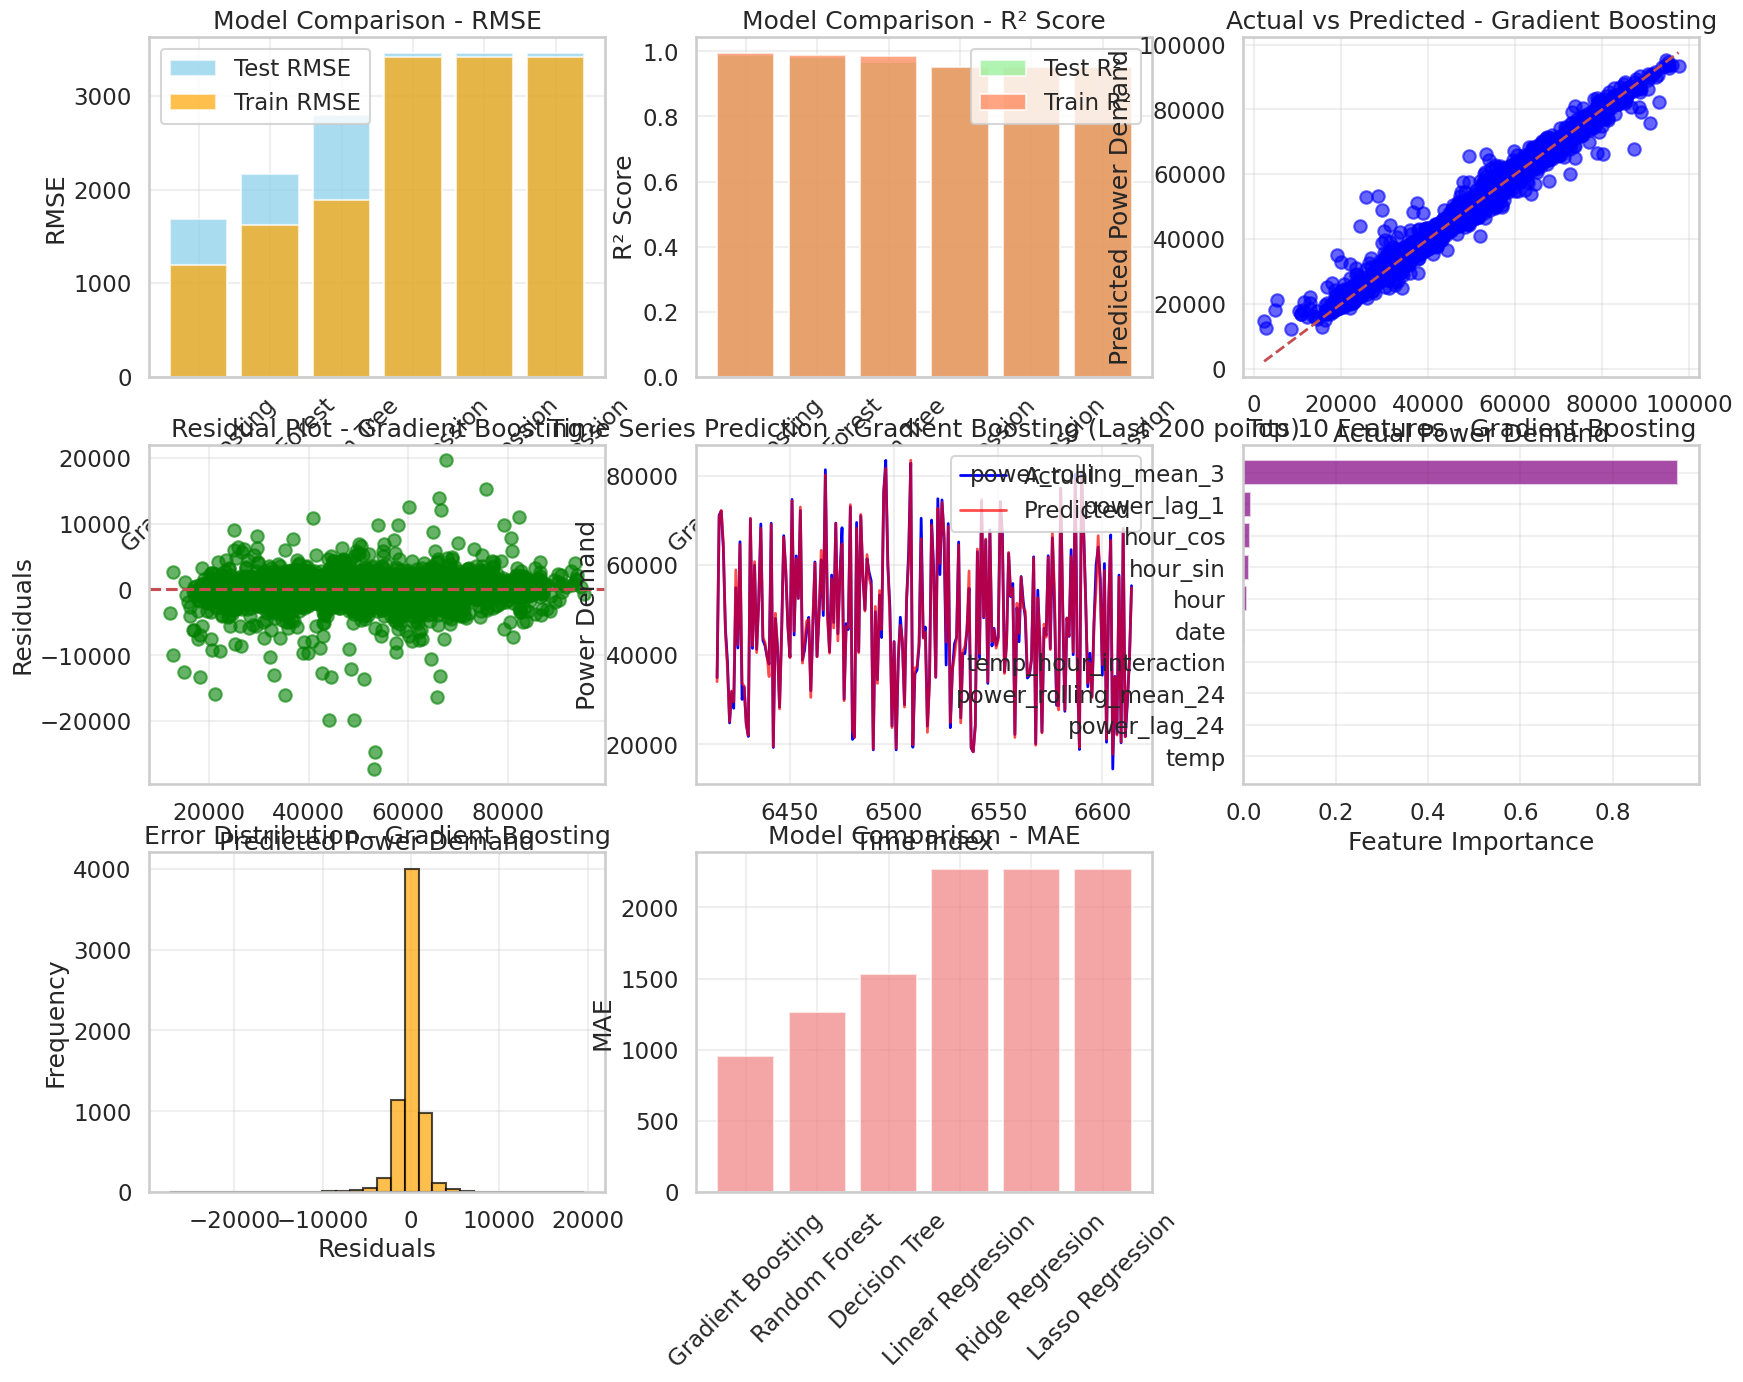

In [ ]:
# ===== STEP 5: MODEL EVALUATION AND COMPARISON =====

print("=== DETAILED MODEL EVALUATION ===")

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train_RMSE': [results[model]['train_rmse'] for model in results.keys()],
    'Test_RMSE': [results[model]['test_rmse'] for model in results.keys()],
    'Train_MAE': [results[model]['train_mae'] for model in results.keys()],
    'Test_MAE': [results[model]['test_mae'] for model in results.keys()],
    'Train_R2': [results[model]['train_r2'] for model in results.keys()],
    'Test_R2': [results[model]['test_r2'] for model in results.keys()],
    'Scaling': [results[model]['scaling'] for model in results.keys()]
})

# Sort by Test R² score (descending)
results_df = results_df.sort_values('Test_R2', ascending=False)
print("\nModel Performance Summary (Sorted by Test R² Score):")
print("="*80)
print(results_df.round(4))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Test RMSE: {results[best_model_name]['test_rmse']:.2f}")
print(f"   Test MAE:  {results[best_model_name]['test_mae']:.2f}")
print(f"   Test R²:   {results[best_model_name]['test_r2']:.4f}")
print(f"   Scaling:   {results[best_model_name]['scaling']}")

# Calculate additional metrics
mape = np.mean(np.abs((y_test - best_predictions) / y_test)) * 100
print(f"   Test MAPE: {mape:.2f}%")

# Visualize results
plt.figure(figsize=(20, 15))

# Plot 1: Model Comparison - RMSE
plt.subplot(3, 3, 1)
plt.bar(range(len(results_df)), results_df['Test_RMSE'], color='skyblue', alpha=0.7)
plt.bar(range(len(results_df)), results_df['Train_RMSE'], color='orange', alpha=0.7)
plt.xticks(range(len(results_df)), results_df['Model'], rotation=45)
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE')
plt.legend(['Test RMSE', 'Train RMSE'])
plt.grid(True, alpha=0.3)

# Plot 2: Model Comparison - R²
plt.subplot(3, 3, 2)
plt.bar(range(len(results_df)), results_df['Test_R2'], color='lightgreen', alpha=0.7)
plt.bar(range(len(results_df)), results_df['Train_R2'], color='coral', alpha=0.7)
plt.xticks(range(len(results_df)), results_df['Model'], rotation=45)
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.legend(['Test R²', 'Train R²'])
plt.grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted (Best Model)
plt.subplot(3, 3, 3)
plt.scatter(y_test, best_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Power Demand')
plt.ylabel('Predicted Power Demand')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.grid(True, alpha=0.3)

# Plot 4: Residuals (Best Model)
plt.subplot(3, 3, 4)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Power Demand')
plt.ylabel('Residuals')
plt.title(f'Residual Plot - {best_model_name}')
plt.grid(True, alpha=0.3)

# Plot 5: Time Series Prediction (Best Model) - Last 200 points for clarity
plt.subplot(3, 3, 5)
plot_points = min(200, len(y_test))
plot_indices = range(len(y_test) - plot_points, len(y_test))
plt.plot(plot_indices, y_test.iloc[-plot_points:], label='Actual', linewidth=2, color='blue')
plt.plot(plot_indices, best_predictions[-plot_points:], label='Predicted', linewidth=2, color='red', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Power Demand')
plt.title(f'Time Series Prediction - {best_model_name} (Last {plot_points} points)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Feature Importance (for tree-based models)
plt.subplot(3, 3, 6)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=True).tail(10)
    
    plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='purple', alpha=0.7)
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Features - {best_model_name}')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, f'{best_model_name}\ndoes not provide\nfeature importance', 
             horizontalalignment='center', verticalalignment='center', 
             transform=plt.gca().transAxes, fontsize=12)
    plt.title('Feature Importance Not Available')

# Plot 7: Error Distribution
plt.subplot(3, 3, 7)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Error Distribution - {best_model_name}')
plt.grid(True, alpha=0.3)

# Plot 8: MAE Comparison
plt.subplot(3, 3, 8)
plt.bar(range(len(results_df)), results_df['Test_MAE'], color='lightcoral', alpha=0.7)
plt.xticks(range(len(results_df)), results_df['Model'], rotation=45)
plt.ylabel('MAE')
plt.title('Model Comparison - MAE')
plt.grid(True, alpha=0.3)

# Plot 9: Overfitting Analysis (Train vs Test R²)
plt.subplot(3, 3, 9)
plt.scatter(results_df['Train_R2'], results_df['Test_R2'], s=100, alpha=0.7, color='purple')
for i, model in enumerate(results_df['Model']):
    plt.annotate(model, (results_df['Train_R2'].iloc[i], results_df['Test_R2'].iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.xlabel('Train R²')
plt.ylabel('Test R²')
plt.title('Overfitting Analysis')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
df.corr()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
datetime,1.000000,0.239396,0.070098,0.968195,0.228131,0.014370,-0.002079,-0.001075,-0.058888,0.002361,...,0.006336,-0.202535,0.017673,0.239616,0.070299,0.242403,0.074726,0.246022,0.288381,0.030212
Power demand,0.239396,1.000000,0.469566,0.235676,0.038331,0.024147,-0.039269,-0.048075,-0.037802,0.184563,...,-0.016377,-0.172567,-0.391782,0.939952,0.455846,0.777902,0.456735,0.967947,0.811831,0.327741
temp,0.070098,0.469566,1.000000,0.043062,0.115056,0.003396,-0.015289,-0.007751,0.008624,0.227456,...,0.012837,-0.227891,-0.757115,0.478048,0.989626,0.448216,0.951445,0.487710,0.428824,0.599791
year,0.968195,0.235676,0.043062,1.000000,-0.021806,-0.003641,-0.000917,-0.000208,-0.072580,0.001990,...,0.007152,-0.009150,-0.030510,0.235731,0.043072,0.236595,0.043591,0.242054,0.283106,0.020431
month,0.228131,0.038331,0.115056,-0.021806,1.000000,-0.012543,-0.004946,-0.003878,0.048050,-0.000786,...,-0.002834,-0.775161,0.187043,0.038803,0.115768,0.046591,0.131439,0.039841,0.049783,0.040358
date,0.014370,0.024147,0.003396,-0.003641,-0.012543,1.000000,0.001679,0.003932,-0.006414,-0.003012,...,0.003988,0.002700,-0.015463,0.024207,0.003435,0.026052,0.004683,0.024855,0.029795,-0.001470
day,-0.002079,-0.039269,-0.015289,-0.000917,-0.004946,0.001679,1.000000,0.791058,-0.010790,0.001088,...,-0.355283,0.003497,0.004180,-0.038357,-0.015060,0.012758,-0.014068,-0.039158,-0.013337,-0.005926
is_weekend,-0.001075,-0.048075,-0.007751,-0.000208,-0.003878,0.003932,0.791058,1.000000,-0.016601,0.003855,...,0.176234,-0.000220,0.003955,-0.047901,-0.007900,-0.008065,-0.012524,-0.048983,-0.032617,0.000627
is_holiday,-0.058888,-0.037802,0.008624,-0.072580,0.048050,-0.006414,-0.010790,-0.016601,1.000000,-0.000845,...,0.005479,-0.037238,0.007128,-0.036846,0.008568,-0.016765,0.010546,-0.037994,-0.029176,0.002651
hour,0.002361,0.184563,0.227456,0.001990,-0.000786,-0.003012,0.001088,0.003855,-0.000845,1.000000,...,0.003981,0.003950,0.004477,0.253324,0.244673,0.186005,0.219027,0.229600,0.002453,0.881003
